<a href="https://colab.research.google.com/github/leidysvalencia/Prueba-objetiva-PLN/blob/main/Pruebas_objetivas_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes del Grupo 14
- Hector Bello Santamaria
- Adriana Maldonado
- Johanna Ramirez Londoño
- Leidys Valencia Bello

En esta actividad, realizaremos los siguientes pasos:

1. Cargar el archivo de datos de noticias.
2. Realizar el preprocesamiento del texto, que incluye:
  + Convertir el texto a minúsculas.
  + Eliminar puntuación.
  + Eliminar números.
  + Eliminar espacios en blanco adicionales.
3. Tokenizar el texto en palabras individuales.
4. Eliminar stop words del texto tokenizado.
5. Calcular TF-IDF para representar el texto como vectores numéricos.
6. Generar embeddings de palabras utilizando Word2Vec.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
file_path = '/content/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos

data.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(14396, 6)

In [ ]:
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


Vamos a realizar el ejercicio sin los datos de la etiqueta archivo ya que como vimos en el trabajo anterior esta categoría genera mucho ruido.

In [ ]:
data= data[data['Etiqueta'] != 'archivo']
data.shape

(5209, 6)

In [ ]:
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
9188,9188,https://www.eltiempo.com/bocas/black-mirror-cr...,"Charlie Brooker: el creador de ""Black Mirror""",BOCAS entrevistó al responsable de la exitosa ...,No resulta fácil meterse en la cabeza de Charl...,bocas
9189,9189,https://www.eltiempo.com/bocas/carlos-duque-ca...,Carlos Duque: el retratista del poder,BOCAS entrevistó a uno de los íconos de la pub...,Sus trabajos en determinadas campañas presiden...,bocas
9190,9190,https://www.eltiempo.com/bocas/carta-abierta-a...,Carta abierta a la universidad pública,Revista BOCAS - Edición 79.,"Los pasados 10 y 17 de octubre, cerca de 500.0...",bocas
9191,9191,https://www.eltiempo.com/bocas/citas-de-casas-...,¡No sea tan Macron!,Citas de Casas - Julio 2017,El modelo político está cambiando en el mundo...,bocas


# Paso 1: Preprocesamiento del Texto
En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [ ]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
9188,No resulta fácil meterse en la cabeza de Charl...,no resulta fácil meterse en la cabeza de charl...
9189,Sus trabajos en determinadas campañas presiden...,sus trabajos en determinadas campañas presiden...
9190,"Los pasados 10 y 17 de octubre, cerca de 500.0...",los pasados y de octubre cerca de personas ...
9191,El modelo político está cambiando en el mundo...,el modelo político está cambiando en el mundo...


Dimensiones de los datos: (4994, 7)


# Paso 2: Tokenización
En este paso, convertiremos el texto preprocesado en una lista de palabras individuales utilizando la tokenización.

In [ ]:
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Tokenización
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc..."
9188,no resulta fácil meterse en la cabeza de charl...,"[no, resulta, fácil, meterse, en, la, cabeza, ..."
9189,sus trabajos en determinadas campañas presiden...,"[sus, trabajos, en, determinadas, campañas, pr..."
9190,los pasados y de octubre cerca de personas ...,"[los, pasados, y, de, octubre, cerca, de, pers..."
9191,el modelo político está cambiando en el mundo...,"[el, modelo, político, está, cambiando, en, el..."


In [ ]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

# Paso 3: Eliminación de Stop Words
En este paso, eliminaremos las stop words de los tokens generados.

In [ ]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
9188,"[no, resulta, fácil, meterse, en, la, cabeza, ...","[resulta, fácil, meterse, cabeza, charlie, bro..."
9189,"[sus, trabajos, en, determinadas, campañas, pr...","[trabajos, determinadas, campañas, presidencia..."
9190,"[los, pasados, y, de, octubre, cerca, de, pers...","[pasados, octubre, cerca, personas, estudiante..."
9191,"[el, modelo, político, está, cambiando, en, el...","[modelo, político, cambiando, mundo, cuenta, é..."


# Paso 4: Cálculo de TF-IDF
En este paso, calcularemos la representación TF-IDF de los textos preprocesados. TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica que pondera la importancia de una palabra en un documento en relación con un corpus.

In [ ]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Usar unigramas y bigramas
    min_df=0.1,         # Palabras presentes en al menos el 10% de los documentos
    max_df=0.9          # Palabras presentes en como máximo el 90% de los documentos
)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

,acuerdo,además,afirmó,agregó,ahora,allí,alto,aseguró,así,atención,...,van,varias,varios,veces,ver,vez,viernes,zona,último,últimos
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
1,0.000000,0.050544,0.0,0.0,0.029048,0.118208,0.000000,0.000000,0.101679,0.0,...,0.077569,0.038619,0.000000,0.155221,0.000000,0.142819,0.0,0.00000,0.039403,0.000000
2,0.000000,0.037991,0.0,0.0,0.021834,0.000000,0.030387,0.000000,0.152853,0.0,...,0.029152,0.029028,0.000000,0.058336,0.054121,0.064410,0.0,0.02883,0.000000,0.058683
3,0.048235,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.057752,0.000000,0.000000,0.057783,0.053608,0.042533,0.0,0.00000,0.000000,0.058127
4,0.108300,0.168982,0.0,0.0,0.000000,0.000000,0.000000,0.126394,0.000000,0.0,...,0.000000,0.000000,0.116698,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000


In [ ]:
# Información adicional
lista_contenido = data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad
lista_contenido = [f"{word} " if (i+1) % 15 != 0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

# Ahora convertimos la lista en un string
contenido = ''.join(lista_contenido)

# Construcción del texto con información adicional
text_info = f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.
"""
print(text_info)

En este ejemplo particular tomamos el contenido:

las autoridades están buscando al conductor de una moto que le lanzó el casco a
carlos alberto carmona operador de grúa de la empresa segrup quien perdió por una hora
el conocimiento tras la agresión en un video quedó registrado el momento en el que
tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la
avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con
los objetos que tienen en sus manos entonces el conductor de la moto arroja su
casco contra el operador el hombre recibe el impacto en su cara por lo que
s e desgonza y en la caída se golpea la cabeza con la grúa que
conduce el agredido perdió el conocimiento por cerca de una hora en ese instante el
agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde
está el operador en el suelo luego su compañero agarra la moto y huye del
lugar y a pocos metros recoge al agresor

# Paso 5: Generación de Embeddings de Palabras con Word2Vec
En este paso, utilizaremos el modelo Word2Vec para generar embeddings de palabras. Los embeddings de palabras son representaciones vectoriales densas que capturan el significado semántico de las palabras.

In [ ]:
import os
from gensim.models import Word2Vec

# Verificar o crear el directorio donde se guardará el modelo
save_dir = "../../Datos/Embeddings/"
os.makedirs(save_dir, exist_ok=True)

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(
    sentences=data['tokens_sin_stopwords'],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save(os.path.join(save_dir, "word2vec.model"))

Embedding de la palabra "noticia":
[-0.30869323  0.2777225  -0.2001427   0.4418516   0.8648205   0.16614205
  0.04812201  0.63221145 -0.8388546   0.8626017  -0.9357245  -1.0905031
 -0.6304552   0.28992012  0.23858957 -0.7644209  -0.51030636 -0.17642461
 -0.3249547  -0.18033893  0.22823821  0.6031409   0.01524842  0.7419836
  0.01021832 -0.4177899  -0.2524991  -0.6858531  -1.201185   -0.10599891
  0.6483734   0.3373934   0.10120548 -0.305861   -0.39338726  0.03493813
 -0.5326111  -0.0595929   0.89881426 -0.99084    -0.52643025 -0.44437063
 -0.3781142   0.536945   -0.07062247  0.32058948 -0.7501018   0.74628246
  0.564515    0.06852204  0.36136904 -0.28140143  0.4977028  -0.48833406
 -0.3492077  -0.48568845  0.1654064  -0.11110091 -0.6650019   0.09394505
  0.1047326   0.29065463 -0.52888674 -0.45580804 -0.15837312 -0.589605
  0.93262434  0.09289669 -0.20947641  0.5754196  -0.02931026  0.5207639
 -0.07451662 -0.8023631   0.01421946  0.40298826  0.15552288 -0.05673526
 -0.47844192 -0.16388

# Guardar Resultados
Finalmente, guardaremos los resultados preprocesados en un archivo CSV para su posterior uso.

In [ ]:
# Guardar en el entorno de Colab
data.to_csv('Noticias_preprocesadas.csv', index=False)

# Descargar el archivo
#from google.colab import files
#files.download('Noticias_preprocesadas.csv')

# Ejercicio
# Ajuste Ejercicio
Hemos creado dos modelos de vectorización de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

+ **Eliminar las palabras vacías del texto:** Esto se realizó en el paso 3
+ **Calcular la representación TF-IDF de los textos preprocesados**: Esto se realizó en el paso 4.
+ **Generar embeddings de palabras utilizando Word2Vec:** Esto se realizó en el paso 5





Para la representación TF-IDF, Ajusamos para que se utilicen unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF con unigramas y bigramas, y un rango de frecuencia de 0.1 a 0.9
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Usar unigramas y bigramas
    min_df=0.1,         # Palabras presentes en al menos el 10% de los documentos
    max_df=0.9          # Palabras presentes en como máximo el 90% de los documentos
)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
print(tfidf_df.head())

# Información adicional
lista_contenido = data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad
lista_contenido = [f"{word} " if (i + 1) % 15 != 0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

# Ahora convertimos la lista en un string
contenido = ''.join(lista_contenido)

# Construcción del texto con información adicional
text_info = f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.
"""
print(text_info)


    acuerdo    además  afirmó  agregó     ahora      allí      alto   aseguró  \
0  0.000000  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.050544     0.0     0.0  0.029048  0.118208  0.000000  0.000000   
2  0.000000  0.037991     0.0     0.0  0.021834  0.000000  0.030387  0.000000   
3  0.048235  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
4  0.108300  0.168982     0.0     0.0  0.000000  0.000000  0.000000  0.126394   

        así  atención  ...       van    varias    varios     veces       ver  \
0  0.000000       0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.101679       0.0  ...  0.077569  0.038619  0.000000  0.155221  0.000000   
2  0.152853       0.0  ...  0.029152  0.029028  0.000000  0.058336  0.054121   
3  0.000000       0.0  ...  0.057752  0.000000  0.000000  0.057783  0.053608   
4  0.000000       0.0  ...  0.000000  0.000000  0.116698  0.000000  0.000000   

        vez  viernes     zona   

Para Word2Vec, utilizamos un tamaño de ventana de 5 y un tamaño de vector de 100.

In [ ]:
import os
from gensim.models import Word2Vec

# Verificar o crear el directorio donde se guardará el modelo
save_dir = "../../Datos/Embeddings/"
os.makedirs(save_dir, exist_ok=True)

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(
    sentences=data['tokens_sin_stopwords'],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save(os.path.join(save_dir, "word2vec.model"))

Embedding de la palabra "noticia":
[-3.32993895e-01  3.96804363e-01 -2.32896119e-01  4.35742736e-01
  9.07229900e-01  4.43057090e-01  8.70967750e-03  2.22685874e-01
 -6.85333312e-01  1.05112827e+00 -8.21386576e-01 -1.00197339e+00
 -7.55892336e-01  4.30807434e-02  4.53894526e-01 -9.45371330e-01
 -7.86580920e-01 -1.84473574e-01 -3.69864941e-01  3.01806867e-01
 -8.82903263e-02  4.91113901e-01 -3.06388974e-01  1.05830836e+00
 -8.14308077e-02 -3.78203988e-01 -9.63802189e-02 -7.17985332e-01
 -1.10487807e+00 -1.47994325e-01  3.32399368e-01  1.66447744e-01
 -1.61128908e-01  1.56316340e-01 -2.51350313e-01 -2.80923992e-01
 -5.64155936e-01  6.44104704e-02  9.57647860e-01 -6.34010851e-01
 -3.63963097e-01 -3.74472111e-01 -3.21149021e-01  6.74775183e-01
 -1.23563066e-01  5.05608976e-01 -7.21096218e-01  7.82378316e-01
  4.30626184e-01  3.56656313e-02  2.96405524e-01 -3.41101974e-01
  6.54040396e-01 -4.61063087e-01 -5.05115271e-01 -4.34040248e-01
  2.90467478e-02 -2.10673690e-01 -4.61522460e-01 -1.055

In [ ]:
# Guardar en el entorno de Colab
data.to_csv('Noticias_preprocesadas2.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('Noticias_preprocesadas2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Crear un Modelo Simple de ACP

Varianza explicada por cada componente: [0.02716542 0.02595858]
Varianza total explicada: 0.05


<ipython-input-85-6d4bb2b8990b>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')


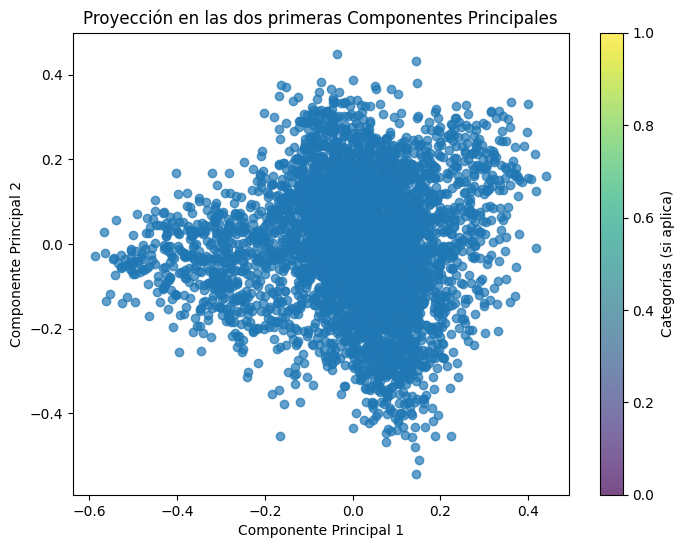

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que tus datos están en una matriz llamada 'tfidf_matrix' o cualquier otra matriz numérica:
# Paso 1: Crear el modelo de ACP
n_components = 2  # Número de componentes principales a calcular
pca = PCA(n_components=n_components)

# Paso 2: Ajustar el modelo y transformar los datos
X_pca = pca.fit_transform(tfidf_matrix.toarray())  # Convertir si es una matriz dispersa

# Paso 3: Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance):.2f}")

# Paso 4: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección en las dos primeras Componentes Principales')
plt.colorbar(label='Categorías (si aplica)')
plt.show()

In [ ]:
print(X_pca )

[[-0.07610648  0.10524651]
 [ 0.0875392  -0.44075376]
 [ 0.0263555  -0.32022329]
 ...
 [ 0.00149911 -0.07697347]
 [ 0.18567778 -0.07423419]
 [-0.00383628  0.04731722]]


# Aplicar clustering a los vectores generados. Utilice el algoritmo KMeans con 5 clusters.

Etiquetas de los clusters:
[4 0 0 ... 2 2 2]


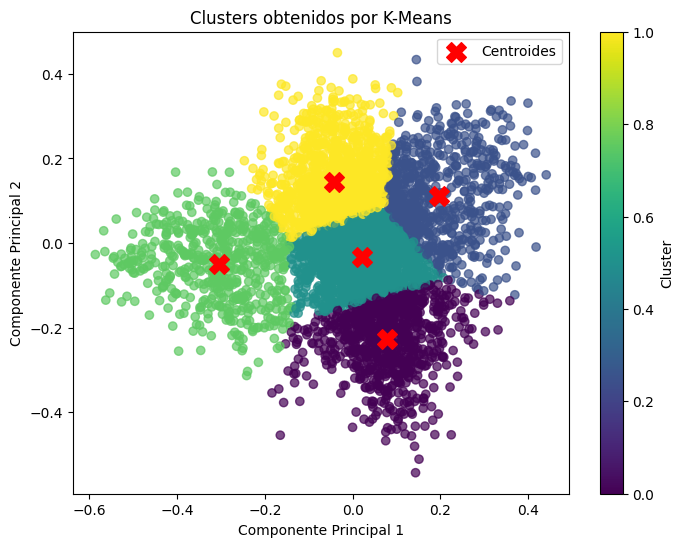

                                    texto_sin_stopwords  cluster
0     autoridades buscando conductor moto lanzó casc...        4
9188  resulta fácil meterse cabeza charlie brooker e...        0
9189  trabajos determinadas campañas presidenciales ...        0
9190  pasados octubre cerca personas estudiantes pad...        1
9191  modelo político cambiando mundo cuenta éxito i...        2


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Crear el modelo K-Means con 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Paso 2: Ajustar el modelo a los datos transformados por PCA
kmeans.fit(X_pca)

# Paso 3: Obtener las etiquetas de los clusters
labels = kmeans.labels_
print(f"Etiquetas de los clusters:\n{labels}")

# Paso 4: Visualización de los clusters en las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels, cmap='viridis', alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroides'
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters obtenidos por K-Means')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Paso 5: Agregar las etiquetas de los clusters a los datos originales
data['cluster'] = labels
print(data[['texto_sin_stopwords', 'cluster']].head())


# Análisis de resultados:


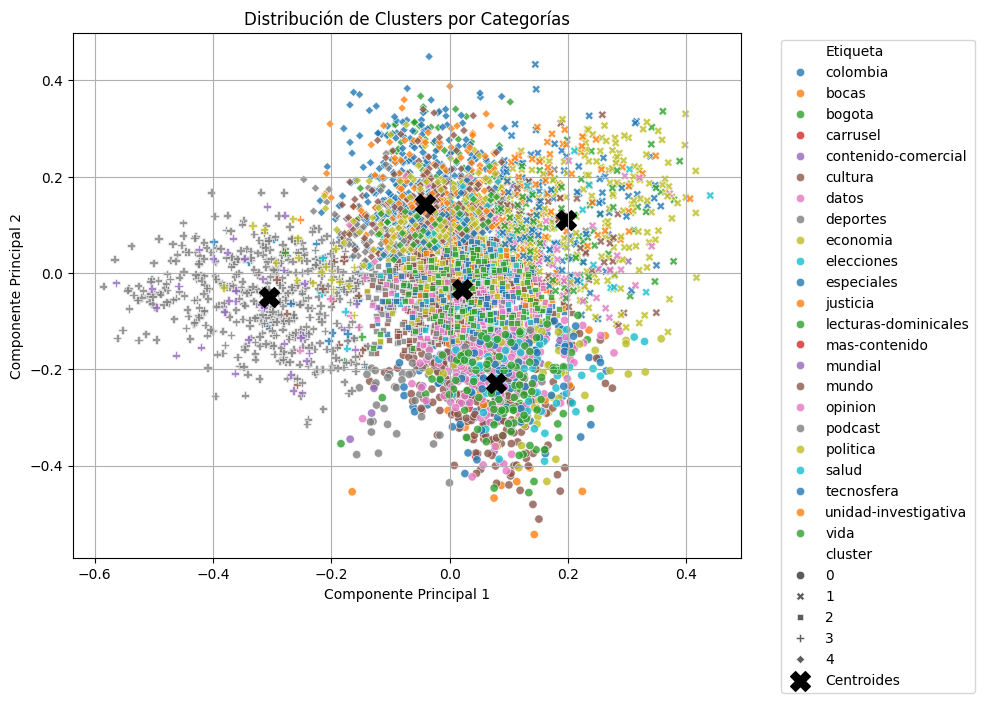

In [ ]:
import seaborn as sns

# Crear un DataFrame con los datos del ACP, clusters y categorías
data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
data_pca.index = data.index
data_pca['Etiqueta'] = data['Etiqueta']
data_pca['cluster'] = labels
data_pca['Etiqueta'] = data['Etiqueta']  # Reemplazar con el nombre real de la columna de categorías

# Visualizar con Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Etiqueta', style='cluster',  # Colorear por categoría y estilizar por cluster
    data=data_pca, palette='tab10', alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='black', marker='X', s=200, label='Centroides'
)
plt.title('Distribución de Clusters por Categorías')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


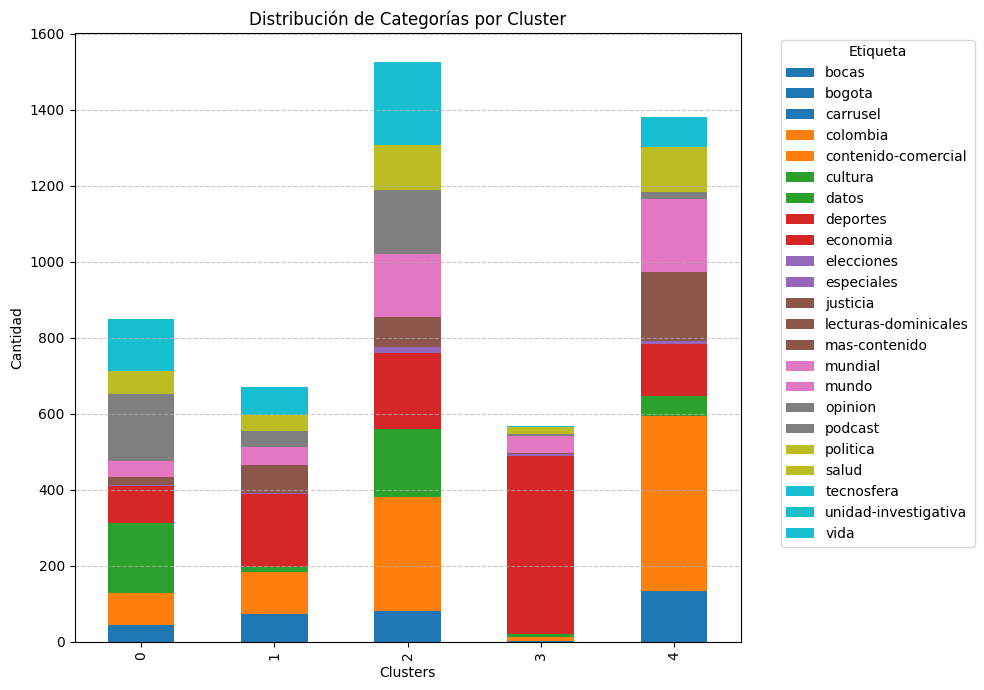

In [ ]:
# Crear una tabla cruzada para contar categorías por cluster
cross_tab = pd.crosstab(data['cluster'], data['Etiqueta'])

# Crear un gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab10')
plt.title('Distribución de Categorías por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Cantidad')
plt.legend(title='Etiqueta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(cross_tab)

Etiqueta  bocas  bogota  carrusel  colombia  contenido-comercial  cultura  \
cluster                                                                     
0            11      30         4        73                   10      185   
1             1      71         0       110                    3       11   
2             1      77         4       287                   12      178   
3             0       2         0        12                    0        7   
4             2     131         0       452                    9       48   

Etiqueta  datos  deportes  economia  elecciones  ...  mas-contenido  mundial  \
cluster                                          ...                           
0             0        50        47           1  ...              1        5   
1             2         6       184           4  ...              1        0   
2             0       108        94          16  ...              1        4   
3             0       467         2           4  ...        

El cluster 0 tiene un nivel de inportancia de palabras como sigue


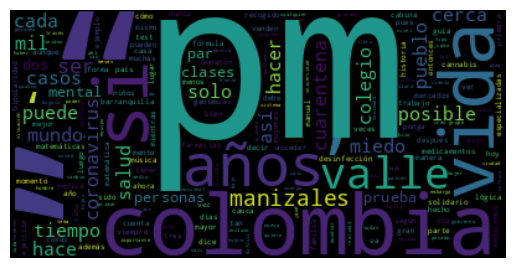

El cluster 1 tiene un nivel de inportancia de palabras como sigue


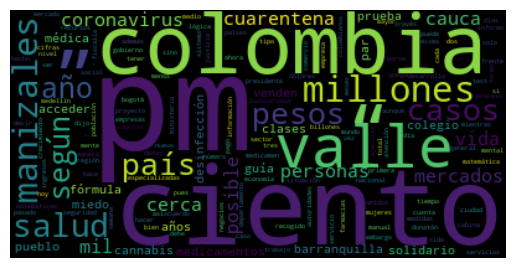

El cluster 2 tiene un nivel de inportancia de palabras como sigue


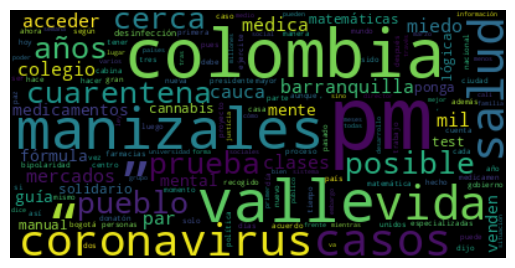

El cluster 3 tiene un nivel de inportancia de palabras como sigue


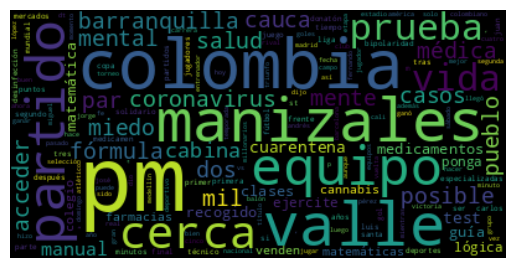

El cluster 4 tiene un nivel de inportancia de palabras como sigue


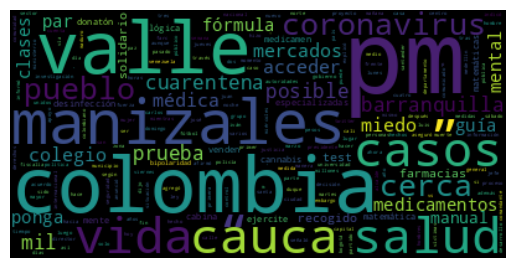

In [ ]:
!pip install wordcloud
n_cluster = data['cluster'].unique
for cluster_id in range(n_clusters):
    print(f"El cluster {cluster_id} tiene un nivel de inportancia de palabras como sigue")
    cluster_data = data[data['cluster'] == cluster_id]
    all_tokens = [token for sublist in cluster_data['tokens_sin_stopwords'] for token in sublist]
    # Calculate the frequency distribution
    frequency_dist = nltk.FreqDist(all_tokens)

    from wordcloud import WordCloud
    wcloud = WordCloud().generate_from_frequencies(frequency_dist)
    import matplotlib.pyplot as plt
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    (-0.5, 399.5, 199.5, -0.5)
    plt.show()

# Preguntas
1. ¿Qué puede inferir de los clusters generados?

La clusterizacion en 5 grupos,  son construidos a través del análisis PCA hecho al resultado del modelo TF IDF.

Logrando que atravez de la comprensión simple de dos componentes se pudiera entender la distribución de las palabras más frecuentes de nuestro corpus de noticias, logrando clasificar 5 clúster.

Tratamos de analizar la composición de las etiquetas (los tipos de noticias) en estos grupos y encontramos por ejemplo qué noticias referentes a temas como, Colombia, justicia, salud y vida se encuentran presentes en casi todos los clusters.
Situación que resultaba logica debido a que el análisis TF IDF busca aquellas palabras que son importantes en todo el corpus.

Que pueden ser nombradas en la mayoría de las noticias pero presentan una baja frecuencia dentro de ellas

**Cluster 0:**
- Categorías destacadas: cultura (185), bogota (30), vida (88).
- Este cluster parece agrupar las noticias relacionadas con aspectos culturales y locales (particularmente de Bogotá). Es probable que las noticias en este cluster tengan un enfoque en temas de estilo de vida y cultura.

**Cluster 1:**
- Categorías destacadas: economia (184), mundo (48), unidad-investigativa (8).
- Las noticias de este cluster podrían centrarse en temas económicos e investigativos, con un alcance internacional.

**Cluster 2:**
- Categorías destacadas: carrusel (287), cultura (178), mundo (162), politica (84).
- Este cluster parece abarcar las noticias relacionadas con política y eventos internacionales, además de temas culturales.

**Cluster 3:**
- Categorías destacadas: deportes (467), mundial (36), mundo (9).
- Este cluster está claramente relacionado con el ámbito deportivo, probablemente enfocado en eventos como el Mundial y noticias deportivas internacionales.

**Cluster 4:**
- Categorías destacadas: carrusel (452), bogota (131), politica (110), mundo (190).
- Este cluster parece combinar noticias de política y eventos globales, con un enfoque adicional en Bogotá. Las noticias  carrusel son predominantes en este cluster.




2. ¿Qué palabras son las más representativas de cada cluster?

Así que encontramos palabras como: Colombia, vida, coronavirus, salud, PM, Que están presentes en todos los clúster, Aunque estamos haciendo una clasificación de las palabras más importantes estas logran aparecer en todas las clasificaciones, debido a que las noticias hablan predominantemente sobre noticias en Colombia en los tiempos de la pandemia,  y así lo encontraremos en todo el corpus.

**Cluster 0:** encontramos algunas palabras como: tiempo, colegio, mental, miedo, qué son representativas de este clúster y posiblemente aquí habla sobre noticias de la situación educativa del tiempos de la pandemia en Colombia.

**Cluster 1:** tiene palabras importantes como: mercado, pesos, acceder, clases, que representan este clóster y podría tener algunas noticias económicas o relacionadas al ambiente social.

**Cluster 2:** contiene algunas palabras referentes a cuarentena, cannabis, casos, mental, medicamentos, que están reforzando que en este closet podrían haber noticias de la salud o los efectos que ha tenido la pandemia en la población.

**Cluster 3:** encontramos palabras como: equipo, partido, Barranquilla, test, mente que son noticias que pueden derivarse a la situación deportiva también influenciado por los efectos de la pandemia.

**Cluster 4:** encontramos palabras como: farmacia, medicamentos, mercados, salud, valle, vagamente se encuentra la palabra ejército y aquí podemos encontrar palabras repetidas en anteriores cluster, lo que resultan ambigua para lograr una deducción certera de la categoría.

3. ¿Qué palabras tienen los embeddings más similares?

Usando el clustering realizado con K-Means se pueden identificar qué palabras tienen embeddings similares, lo que se propone es aprovechar los centroides de los clusters y las palabras que pertenecen a cada cluster.

* Cada cluster agrupa palabras que son similares semántica o contextualmente según los datos y el modelo utilizado.
* Los valores (por ejemplo, 0.9934) indican cuán representativa o importante es una palabra dentro del cluster.
* Estas agrupaciones pueden interpretarse como temas o conceptos.


In [ ]:
# Concatar todas las listas de tokens en un solo listado de palabras
all_tokens = sum(data['tokens_sin_stopwords'], [])

# Crear un vocabulario único (conjunto de palabras)
vocabulario = list(set(all_tokens))

# Verificar las primeras palabras del vocabulario
print(vocabulario[:10])

['indagará', 'dannys', 'enterrarla', 'adquiera', 'valoraría', 'centrocampista', 'festivo', 'rescatarlas', 'dividí', 'httpswwwyoutubecomwatchvypmltudnwbo']


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Obtener los embeddings de todas las palabras
embeddings = np.array([word2vec_model.wv[word] for word in vocabulario])

# Entrenar el modelo KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Calcular los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Agrupar las palabras por clusters
clusters = {i: [] for i in range(n_clusters)}
for word, label in zip(vocabulario, labels):
    clusters[label].append(word)

# Mostrar las palabras más cercanas a cada centroide
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}:")

    # Obtener los embeddings de las palabras en este cluster
    cluster_embeddings = np.array([word2vec_model.wv[word] for word in words])

    # Calcular la similitud coseno entre las palabras de este cluster y el centroide
    similarities = cosine_similarity(cluster_embeddings, [centroids[cluster_id]])

    # Ordenar las palabras por similitud (de mayor a menor)
    similar_words_idx = np.argsort(similarities.flatten())[::-1]

    # Mostrar las palabras más similares al centroide
    for idx in similar_words_idx[:10]:  # Top 10 más similares
        print(f"{words[idx]}: {similarities[idx][0]:.4f}")
    print()

Cluster 0:
llamativos: 0.9934
buscaba: 0.9926
mclaren: 0.9924
cocineros: 0.9922
quiebra: 0.9920
neto: 0.9919
dominó: 0.9917
asilo: 0.9917
rio: 0.9916
reconocieron: 0.9914

Cluster 1:
colorá: 0.9941
daiki: 0.9939
tiger: 0.9932
espanyol: 0.9931
tallo: 0.9930
dañó: 0.9926
stroll: 0.9923
flavio: 0.9922
clay: 0.9919
mantenerlos: 0.9917

Cluster 2:
extranjeros: 0.9781
migrantes: 0.9737
turistas: 0.9699
afectadas: 0.9674
unidades: 0.9671
localidades: 0.9651
representan: 0.9646
accidentes: 0.9635
presentaron: 0.9632
desempleo: 0.9627

Cluster 3:
reunió: 0.9772
liliana: 0.9767
participó: 0.9758
gaitán: 0.9697
española: 0.9686
brasileño: 0.9679
quintero: 0.9678
titular: 0.9672
concejo: 0.9661
rionegro: 0.9661

Cluster 4:
voces: 0.9880
seguramente: 0.9865
tratando: 0.9853
den: 0.9850
consideran: 0.9845
temor: 0.9839
intentar: 0.9838
margen: 0.9836
evidente: 0.9835
aspecto: 0.9829

